<h3>2.1 Loading the MNIST dataset in Keras</h3>

In [9]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

In [21]:

test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<h3>2.2 The network architecture</h3>

In [23]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<h3>2.3 The compilation step</h3>

In [24]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

<h2>3.5 First steps with TensorFlow</h2>

<h3>3.1 All-ones or all-zeros tensors</h3>

In [30]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))  
print(x)

x = tf.zeros(shape=(2, 1))   
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


<h3>3.2 Random tensors</h3>

In [32]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) 
print(x)

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)  
print(x)

tf.Tensor(
[[-1.2370464 ]
 [-0.74474037]
 [ 0.8071061 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.9060302 ]
 [0.12837458]
 [0.63006437]], shape=(3, 1), dtype=float32)


<h3>3.3 NumPy arrays are assignable</h3>

In [37]:
x = tf.ones(shape=(2, 2))

x[0, 0] = 0.  

<h3>This will fail, as a tensor isn’t assignable.</h3>

<h3>3.5 Creating a TensorFlow variable</h3>

In [38]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.93643683],
       [0.4371457 ],
       [0.31691277]], dtype=float32)>


<h3>3.6 Assigning a value to a TensorFlow variable</h3>

In [39]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

<h3>3.7 Assigning a value to a subset of a TensorFlow variable</h3>

In [40]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

<h3>3.8 Using assign_add()</h3>

In [41]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

<h1>3.5.2 Tensor operations: Doing math in TensorFlow</h1>

<h3>3.9 A few basic math operations</h3>

In [42]:
a = tf.ones((2, 2))
b = tf.square(a)       ## Take the square.
c = tf.sqrt(a)         ## Take the square root.
d = b + c              ## Add two tensors (element-wise).
e = tf.matmul(a, b)    ##  Take the product of two tensors (as discussed in chapter 2).
e *= d                 ## Multiply two tensors (element-wise).

<h1>3.5.3 A second look at the GradientTape API</h1>

<h3>3.10 Using the GradientTape</h3>

In [44]:
input_var = tf.Variable(initial_value=3.) 
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

radients = tape.gradient(loss, weights)  ## This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights

<h3>3.11 Using GradientTape with constant tensor inputs</h3>

In [46]:
input_const = tf.constant(3.) 
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

<h3>3.12 Using nested gradient tapes to compute second-order gradients</h3>

In [47]:
time = tf.Variable(0.) 
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2 
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

<h1>3.5.4 An end-to-end example: A linear classifier in pure TensorFlow</h1>

<h3>3.13 Generating two classes of random points in a 2D plane</h3>

In [54]:
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(   
    mean=[0, 3],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class)                     
positive_samples = np.random.multivariate_normal(   
    mean=[3, 0],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class) 

<h3>3.14 Stacking the two classes into an array with shape (2000, 2)</h3>

In [55]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

<h3>3.15 Generating the corresponding targets (0 and 1)</h3>

In [56]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

<h3>3.16 Plotting the two point classes (see figure 3.6)</h3>

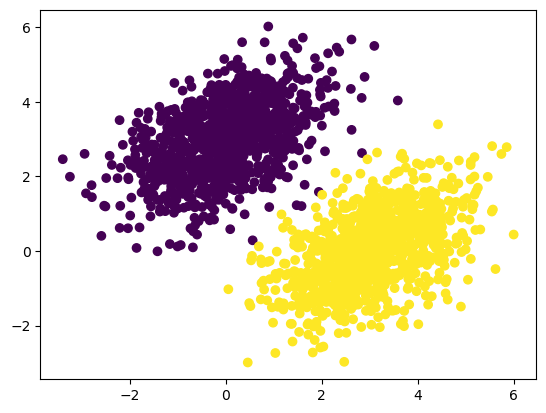

In [57]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

<h3>3.17 Creating the linear classifier variables</h3>

In [58]:
input_dim = 2      
output_dim = 1     
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

<h3>3.18 The forward pass function</h3>

In [59]:
def model(inputs):
    return tf.matmul(inputs, W) + b

<h3>3.19 The mean squared error loss function</h3>

In [61]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   
    return tf.reduce_mean(per_sample_losses) 

<h3>3.20 The training step function</h3>

In [63]:
learning_rate = 0.1 
  
def training_step(inputs, targets):
    with tf.GradientTape() as tape:                                  
        predictions = model(inputs)                                  
        loss = square_loss(targets, predictions)                     
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   
    W.assign_sub(grad_loss_wrt_W * learning_rate)                    
    b.assign_sub(grad_loss_wrt_b * learning_rate)                    
    return loss

<h3>3.21 The batch training loop</h3>

In [68]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")



Loss at step 0: 0.0258
Loss at step 1: 0.0258
Loss at step 2: 0.0258
Loss at step 3: 0.0258
Loss at step 4: 0.0258
Loss at step 5: 0.0258
Loss at step 6: 0.0258
Loss at step 7: 0.0258
Loss at step 8: 0.0258
Loss at step 9: 0.0258
Loss at step 10: 0.0258
Loss at step 11: 0.0258
Loss at step 12: 0.0258
Loss at step 13: 0.0258
Loss at step 14: 0.0257
Loss at step 15: 0.0257
Loss at step 16: 0.0257
Loss at step 17: 0.0257
Loss at step 18: 0.0257
Loss at step 19: 0.0257
Loss at step 20: 0.0257
Loss at step 21: 0.0257
Loss at step 22: 0.0257
Loss at step 23: 0.0257
Loss at step 24: 0.0257
Loss at step 25: 0.0257
Loss at step 26: 0.0257
Loss at step 27: 0.0257
Loss at step 28: 0.0257
Loss at step 29: 0.0257
Loss at step 30: 0.0257
Loss at step 31: 0.0257
Loss at step 32: 0.0257
Loss at step 33: 0.0257
Loss at step 34: 0.0257
Loss at step 35: 0.0257
Loss at step 36: 0.0257
Loss at step 37: 0.0257
Loss at step 38: 0.0257
Loss at step 39: 0.0257


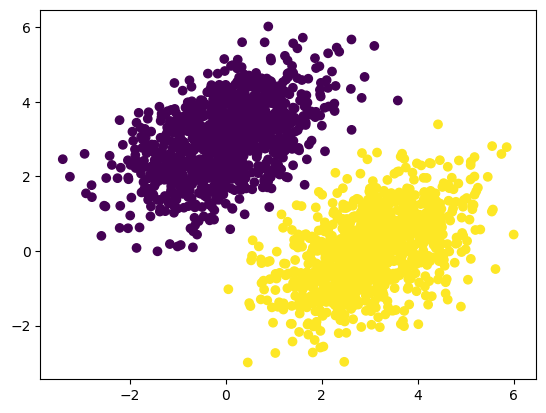

In [69]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

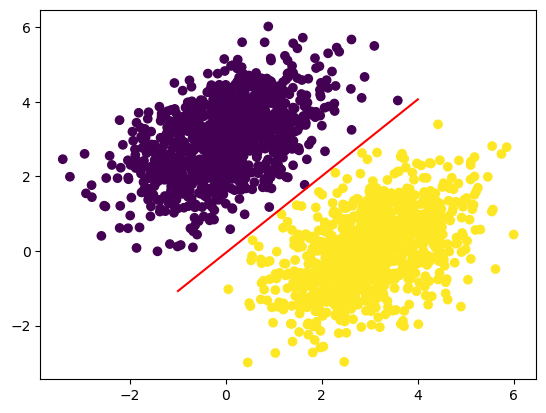

In [70]:
x = np.linspace(-1, 4, 100)                                          
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]                            
plt.plot(x, y, "-r")                                                 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)   